<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("Turkey_data.csv")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the random seed for reproducibility
# np.random.seed(11)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model with validation data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
14/14 [==============================] - 1s 14ms/step - loss: 0.0401 - val_loss: 0.0170
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0101 - val_loss: 0.0048
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/50
14/14 [==============================] - 0s 4ms/step - loss: 9.2714e-04 - val_loss: 0.0011
Epoch 11/50
14

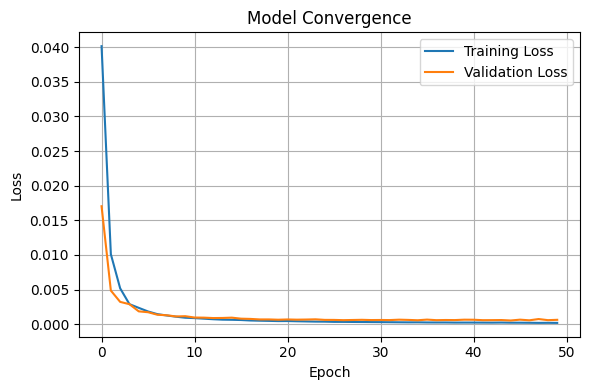

In [83]:
# Plot the convergence curve for training and validation
fig = plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Convergence')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()
fig.savefig('CNN_convergence.png')

In [85]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
from math import sqrt

# Calculate predictions for both training and testing datasets
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the MSE, R-squared, MAE, and RMSE for both training and testing datasets
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Create a table to display the results
results = pd.DataFrame({
    'Metric': ['MSE', 'R-squared', 'MAE', 'RMSE'],
    'Training Set': [train_mse, train_r2, train_mae, train_rmse],
    'Testing Set': [test_mse, test_r2, test_mae, test_rmse]
})

print(results)


4/4 [==============================] - 0s 4ms/step
      Metric  Training Set  Testing Set
0        MSE      0.070731     0.087547
1  R-squared   -172.955738  -149.389869
2        MAE      0.194802     0.205993
3       RMSE      0.265954     0.295884


4/4 [==============================] - 0s 3ms/step


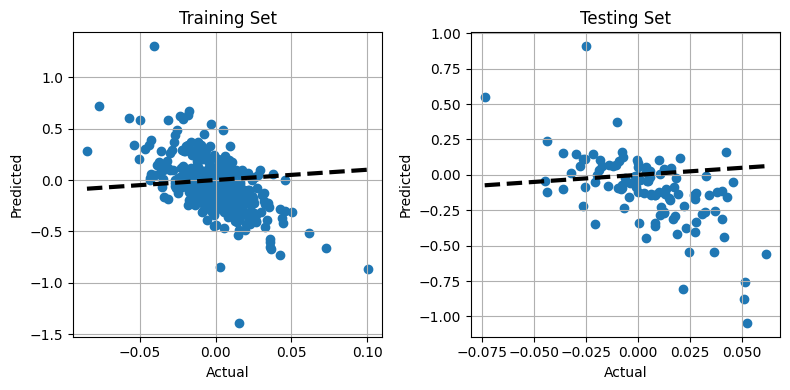

In [86]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.scatter(y_train, train_pred, label='Training')
ax1.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('Training Set')
ax1.grid(True)

ax2.scatter(y_test, test_pred, label='Testing')
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('Testing Set')
ax2.grid(True)

plt.tight_layout()
plt.show()
# Save the figure
fig.savefig('Correlation.png')

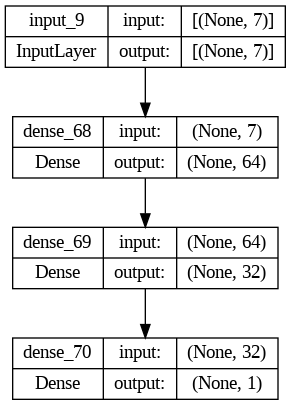

In [89]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_shape = X_train.shape[1]

# Define the model architecture
inputs = Input(shape=(input_shape,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

In [87]:
# Save the model
model.save('CNN_model_Turkey.h5')

In [88]:
# # Load the saved model
# loaded_model = load_model('CNN_model_Turkey.h5')